<a href="https://colab.research.google.com/github/jangvu/Project_by_me/blob/main/time_series_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
raw_data = np.load('/content/drive/MyDrive/Data/candidate_test/data_train_candidate.npy')
test_data = np.load('/content/drive/MyDrive/Data/candidate_test/data_test_candidate.npy')

In [108]:
X_full, y_full = raw_data[:,:3], raw_data[:,3:]
X_test_full, y_test_full = test_data[:,:3], test_data[:,3:]

**Creating window size = 10, shift = 1**

In [ ]:
'''def getdata(data,windowsize,shift):
  X_data = []
  y_data = []
  for i in range(len(data) - windowsize - shift):
    X_data.append(data[i:i+ windowsize, :])
    y_data.append(data[i+windowsize:i+windowsize+shift])
  return X_data, y_data

In [111]:
X_data = []
y_data = []
data = X_full
X_test = []
y_test = []
windowsize = 10
shift = 1
for i in range(len(data) - windowsize - shift):
  X_data.append(X_full[i:i+ windowsize, :])
  y_data.append(y_full[i+windowsize: i+windowsize+shift, :])
  X_test.append(X_test_full[i:i+ windowsize, :])
  y_test.append(y_test_full[i+windowsize: i+windowsize+shift, :])


In [112]:
X_data = np.asarray(X_data)
y_data = np.asarray(y_data)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

X_data.shape

(989, 10, 3)

**Check input into format of LSTM**

In [ ]:
print(X_data.shape)
print(y_data.shape)
#X_data = X_data.reshape(-1,10,3)
#y_data = y_data.reshape(-1)


(989, 10, 3)
(989, 1, 1)


**Build RRN model**

Optimize + Learning rate + Early_stop

In [118]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)

In [148]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return 0.001

In [149]:
learning_rate = keras.callbacks.LearningRateScheduler(scheduler)
#early_stop = keras.callbacks.EarlyStopping(patience=50, monitor='loss')

If using more layers -> overfitting, using BatchNormalization is not necessesary because data is in the same scale

In [168]:
n_input = 10
n_features = 3

rnn_model = keras.models.Sequential([keras.layers.LSTM(units=10, input_shape=(n_input, n_features)),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Dense(1)])

rnn_model.compile(optimizer=optimizer, loss='mse')

In [169]:
history = rnn_model.fit(X_data,y_data,epochs=200, batch_size=32,callbacks =[learning_rate])

Epoch 1/200
31/31 [==============================] - 2s 4ms/step - loss: 4.2912e-05
Epoch 2/200
31/31 [==============================] - 0s 4ms/step - loss: 1.1682e-06
Epoch 3/200
31/31 [==============================] - 0s 4ms/step - loss: 1.6910e-07
Epoch 4/200
31/31 [==============================] - 0s 4ms/step - loss: 1.2676e-07
Epoch 5/200
31/31 [==============================] - 0s 4ms/step - loss: 1.2143e-07
Epoch 6/200
31/31 [==============================] - 0s 4ms/step - loss: 9.5363e-08
Epoch 7/200
31/31 [==============================] - 0s 4ms/step - loss: 9.1241e-08
Epoch 8/200
31/31 [==============================] - 0s 4ms/step - loss: 9.3594e-08
Epoch 9/200
31/31 [==============================] - 0s 4ms/step - loss: 8.3407e-08
Epoch 10/200
31/31 [==============================] - 0s 4ms/step - loss: 7.4909e-08
Epoch 11/200
31/31 [==============================] - 0s 4ms/step - loss: 6.4439e-08
Epoch 12/200
31/31 [==============================] - 0s 5ms/step - loss: 

In [158]:
X_test = X_test.reshape(-1,10,3)
X_test.shape

(989, 10, 3)

**Reshape to plot**

In [175]:
y_pred = rnn_model.predict(X_test)
y_pred = y_pred.reshape(-1)
y_test = y_test.reshape(-1)
y_pred.shape

(989,)

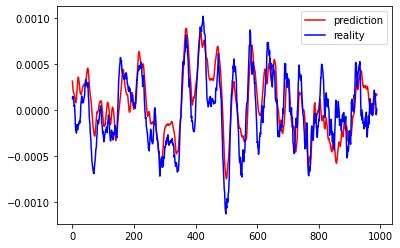

In [160]:
plt.plot(y_pred, color = 'red', label = 'prediction')
plt.plot(y_test, color = 'blue', label ='reality')
plt.legend()
plt.show()

In [161]:
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true, Y_pred)

In [162]:
last_time_step_mse(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=5.59582e-08>

**Learning_curves**

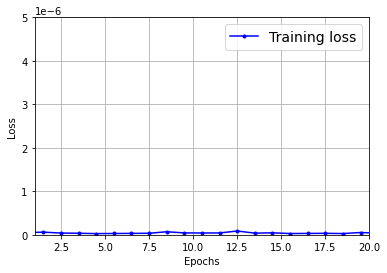

In [164]:
def plot_learning_curves(loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.axis([1, 20, 0, 0.000005])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"])
plt.show()

**Build CNN Model**

Choosing filters and kerel size to get a better result

In [270]:
conv_model = tf.keras.Sequential([keras.layers.InputLayer(input_shape=[10, 3]),
                                  keras.layers.Conv1D(filters=32,kernel_size=4,activation='relu'),
                           keras.layers.Conv1D(filters=16,kernel_size=2,activation='relu'),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=1),
])

In [271]:
conv_model.compile(loss = 'mse', optimizer=optimizer)
conv_model.fit(X_data,y_data,epochs=200, callbacks=[learning_rate])

Epoch 1/200
31/31 [==============================] - 1s 2ms/step - loss: 9.0406e-06
Epoch 2/200
31/31 [==============================] - 0s 1ms/step - loss: 3.5007e-07
Epoch 3/200
31/31 [==============================] - 0s 1ms/step - loss: 1.4177e-07
Epoch 4/200
31/31 [==============================] - 0s 1ms/step - loss: 1.2290e-07
Epoch 5/200
31/31 [==============================] - 0s 2ms/step - loss: 1.2264e-07
Epoch 6/200
31/31 [==============================] - 0s 2ms/step - loss: 1.3350e-07
Epoch 7/200
31/31 [==============================] - 0s 1ms/step - loss: 1.2272e-07
Epoch 8/200
31/31 [==============================] - 0s 2ms/step - loss: 1.1827e-07
Epoch 9/200
31/31 [==============================] - 0s 2ms/step - loss: 1.0619e-07
Epoch 10/200
31/31 [==============================] - 0s 1ms/step - loss: 1.0134e-07
Epoch 11/200
31/31 [==============================] - 0s 1ms/step - loss: 1.1439e-07
Epoch 12/200
31/31 [==============================] - 0s 1ms/step - loss: 

In [275]:
y_pred_2 = conv_model.predict(X_test)
y_pred_2.shape

(989, 6, 1)

In [276]:
y_plot = []
for i in y_pred_2:
  y_plot.append(i[-1])

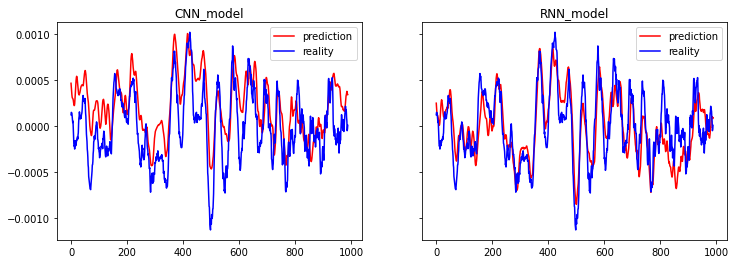

In [279]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 4))

plt.sca(axes[0])
plt.plot(y_plot, color ='red', label ='prediction')
plt.plot(y_test, color ='blue',label ='reality')
plt.title('CNN_model')
plt.legend()

plt.sca(axes[1])
plt.plot(y_pred, color = 'red', label = 'prediction')
plt.plot(y_test, color = 'blue', label ='reality')
plt.title('RNN_model')
plt.legend()
plt.show()

RNN result looks better compare with the CNN one